In [29]:
import pandas as pd

data = pd.read_csv("train.csv")

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

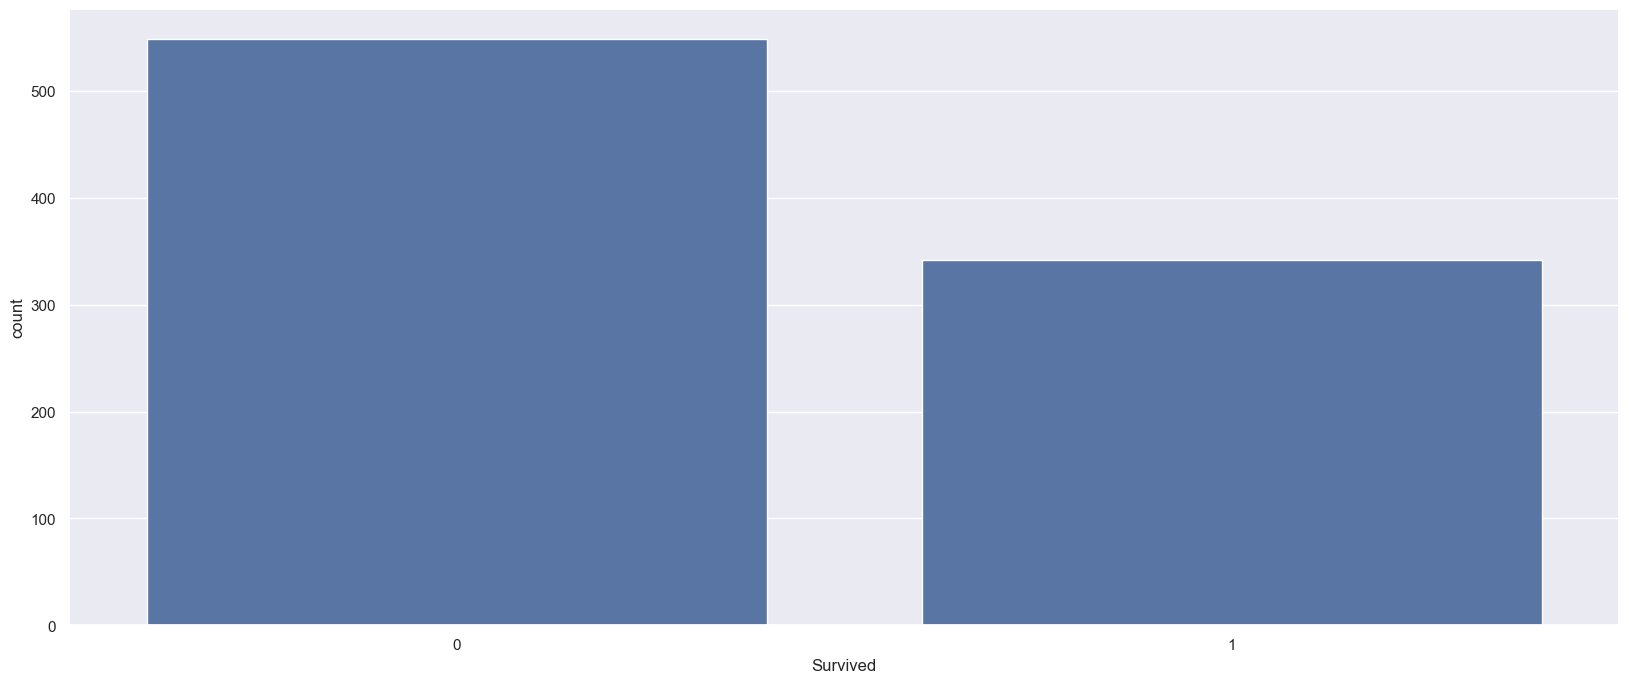

In [32]:
import seaborn as sb

sb.countplot(x="Survived",data=data)

<Axes: xlabel='Survived', ylabel='count'>

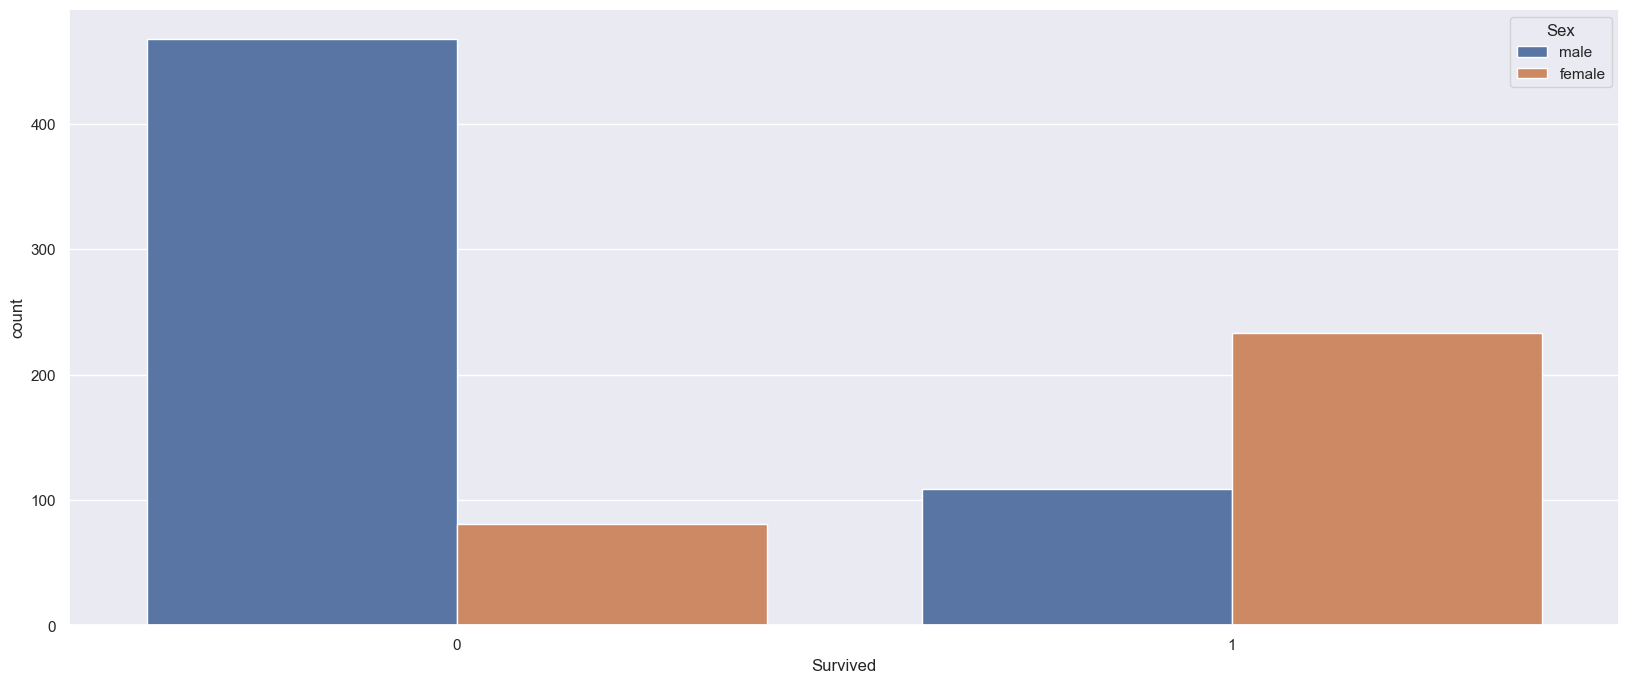

In [33]:
sb.countplot(x="Survived",data=data,hue="Sex")

In [34]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

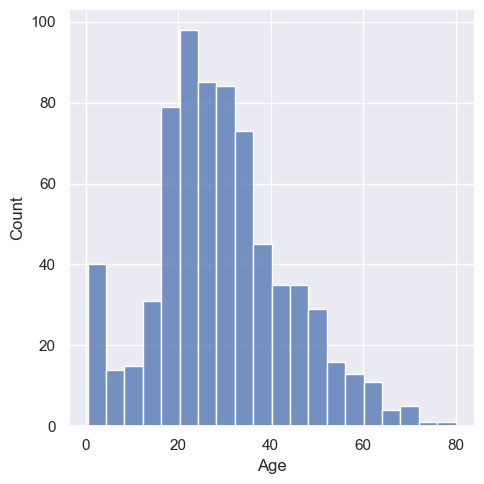

In [35]:
sb.displot(x="Age",data=data)

In [36]:
data["Age"].mean()

29.69911764705882

In [37]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [38]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
data.drop(columns=["PassengerId","Name","Cabin"],inplace=True)

In [40]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [41]:
data = data.dropna()

In [42]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [43]:
dummies_sex = pd.get_dummies(data["Sex"],drop_first=True,dtype=int)

In [44]:
data = data.join(dummies_sex)

In [45]:
data.drop(columns=["Sex","Ticket"],inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

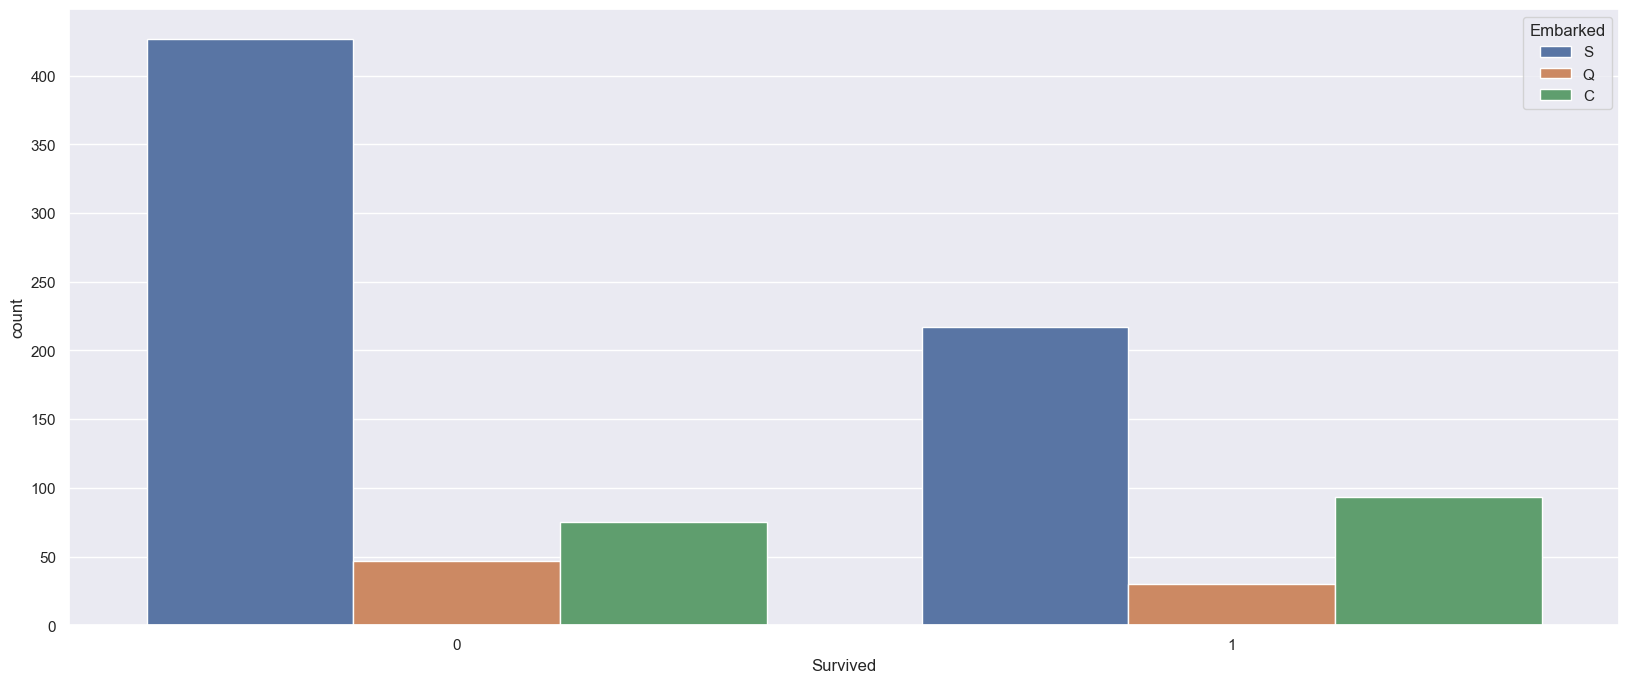

In [46]:
sb.countplot(data=data,x="Survived",hue="Embarked")

In [47]:
dummies_embarked = pd.get_dummies(data["Embarked"],drop_first=True,dtype=int)

In [48]:
data = data.join(dummies_embarked)
data.drop(columns=["Embarked"],inplace=True)

<Axes: >

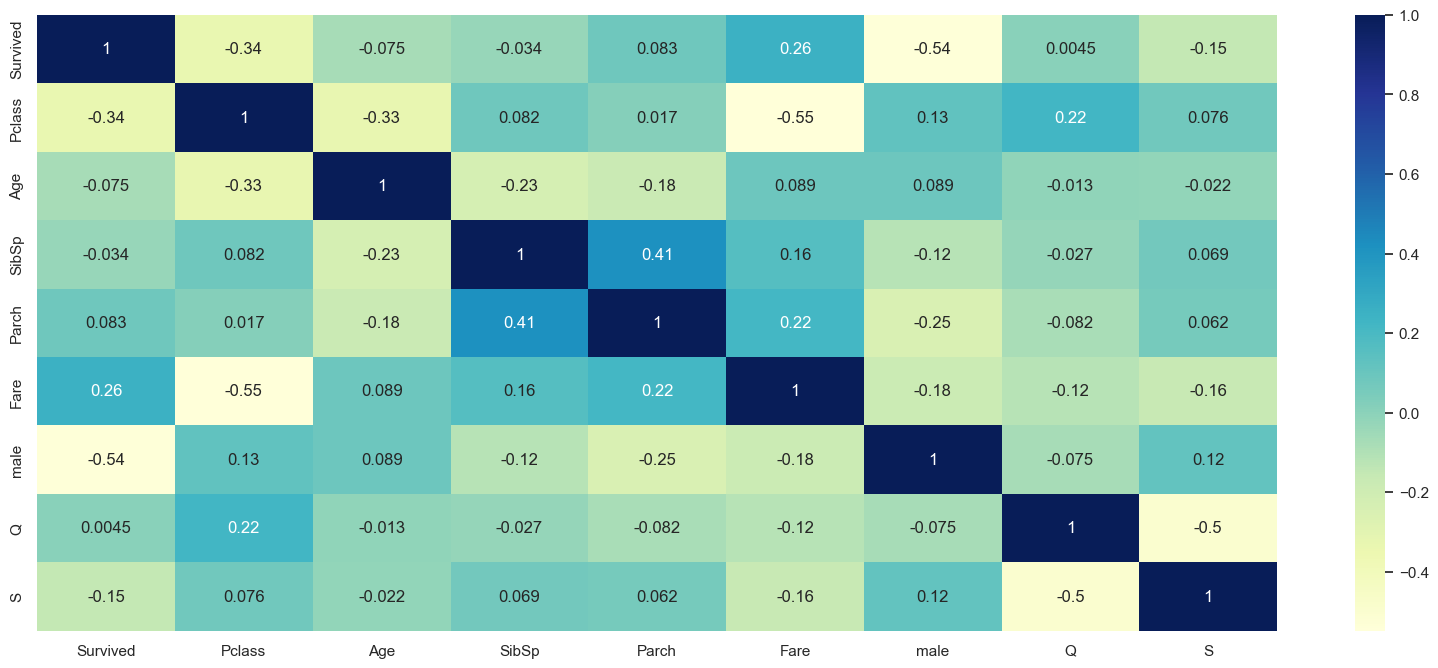

In [49]:
sb.set_theme(rc={'figure.figsize':(20,8)})
sb.heatmap(data=data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

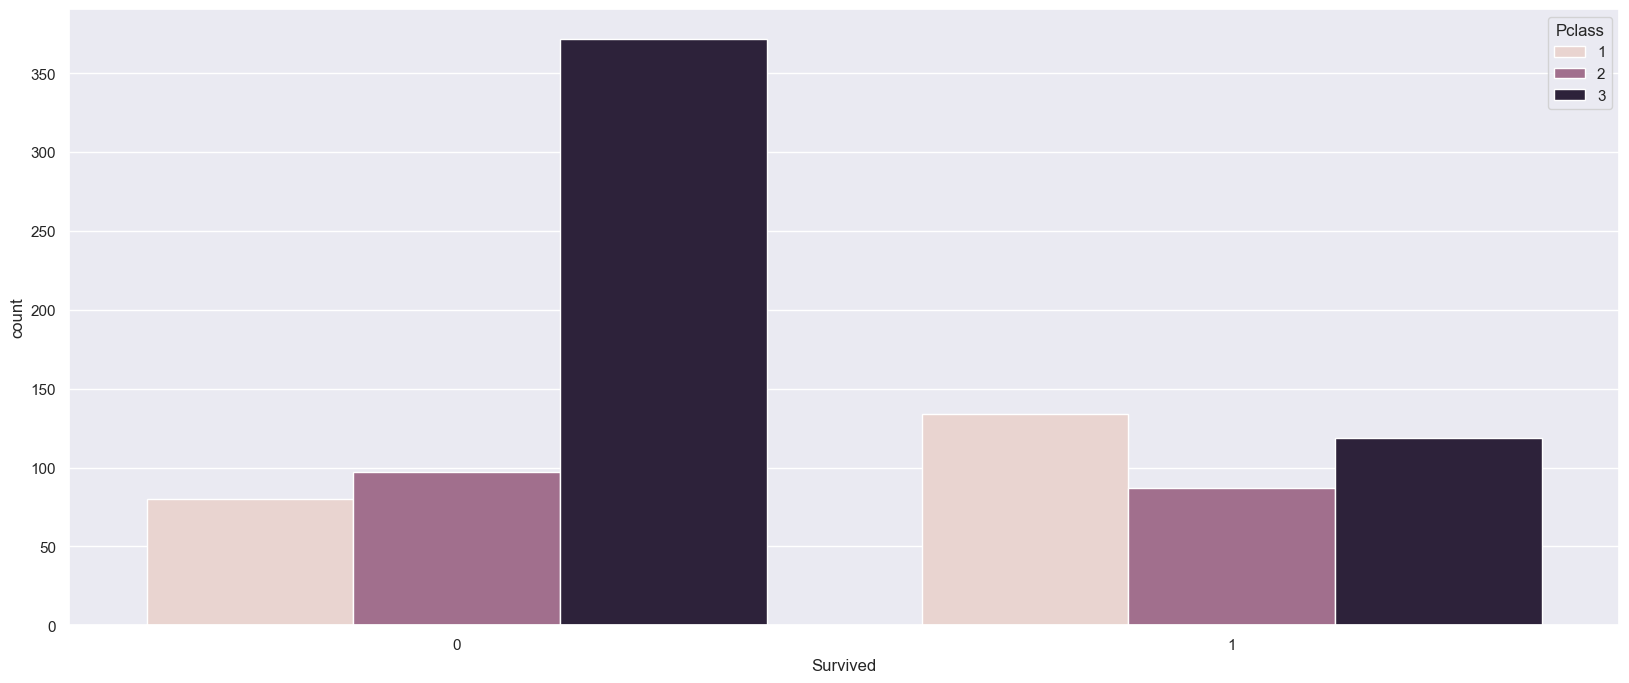

In [50]:
sb.countplot(x="Survived",data=data,hue="Pclass")

In [51]:
x = data.drop(columns=["Survived"],axis=1)
y = data["Survived"]

In [52]:
from sklearn.model_selection import train_test_split

x_tra, x_test, y_tra, y_test = train_test_split(x,y,test_size=.2)

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_tra,y_tra)

LogisticRegression(max_iter=1000)

In [54]:
prediccion = model.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediccion)

0.8146067415730337

In [56]:
from sklearn. metrics import classification_report
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.77      0.72      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediccion)

array([[97, 14],
       [19, 48]], dtype=int64)

In [59]:
pd.DataFrame(confusion_matrix(y_test,prediccion),columns=["Pred: No","Pred: Si"],index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,97,14
Real: Si,19,48


In [61]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [66]:
prediccion_v2 = model.predict([[3,35,0,0,10,1,0,0]])
if prediccion_v2==1:
    print("Sobreviviste")
else:
    print("No Sobreviviste")

No Sobreviviste


c:\Users\k_ev_\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
